Dataset is from
https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
house_data= pd.read_csv("./Dataset/housing.csv", usecols=["longitude","latitude","median_house_value"])
house_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

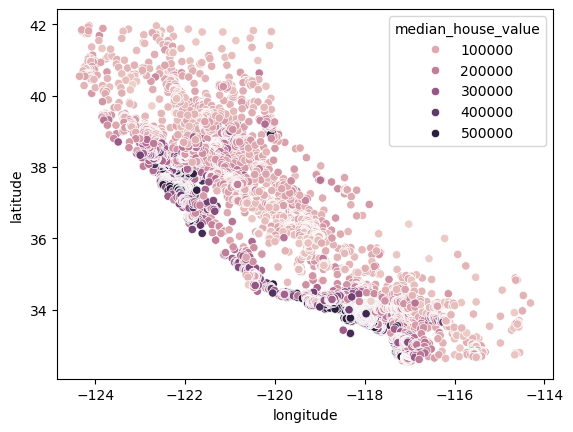

In [6]:
sns.scatterplot(data = house_data, x='longitude', y='latitude', hue='median_house_value')
#plt.show()

# Data Preprocessing
- Train/Test Split the darta
- Scale the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_data[['latitude','longitude']],house_data[['median_house_value']], test_size=0.33, random_state=0)

In [9]:
#Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement the Model

In [ ]:
# Model Implementation
# Use k=3 for the time being
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init='auto',random_state=11)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=11)

<Axes: xlabel='longitude', ylabel='latitude'>

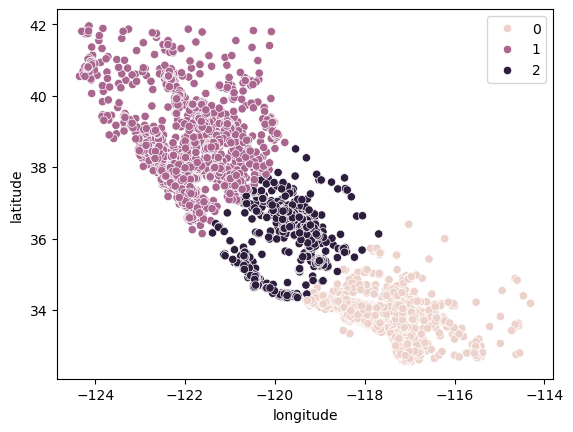

In [ ]:
# Display the Clusters using seaborn
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=kmeans.labels_)

In [17]:
y_train

,median_house_value
14069,139000.0
17482,288900.0
7362,146300.0
19526,137500.0
8365,128100.0
...,...
13123,144600.0
19648,159400.0
9845,289300.0
10799,484600.0


<Axes: ylabel='median_house_value'>

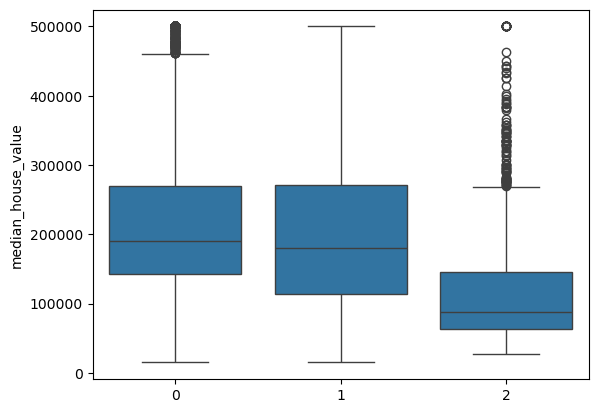

In [16]:
# Use seaborn Boxplots to visualize cluster distribution
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

# Calculate the Model Performance

Silhouette Score: The best value is 1 and the worst value is -1. Values near 0 indicate overlap

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_scaled, kmeans.labels_, metric='euclidean')

0.6461157864451063

# Selection of Best Number of Clusters

In [19]:
# Use Elbow Method to Select the best number of clusters for the problem

K = range(1,15)
fits = []
score = []

for k in K:
    # train the model for the current value of k on training data
    model = KMeans(n_clusters=k, random_state=11, n_init='auto').fit(X_train_scaled)

    # append the model to fits
    fits.append(model)

    # append the silhoutte socre to scores
    score.append(model.inertia_)

<Axes: >

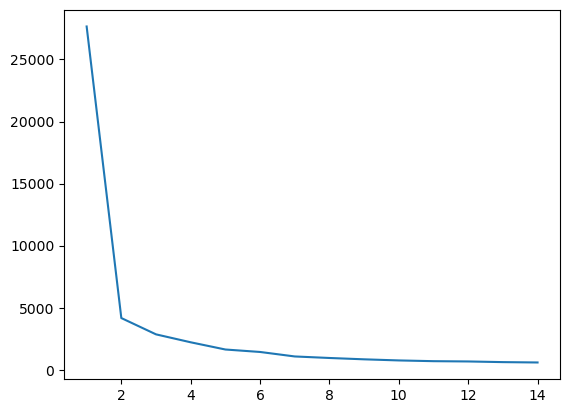

In [20]:
# Display the plot
sns.lineplot(x = K , y = score)

In [21]:
# Use the selected k to train a new model
# Model Implementation
kmeans = KMeans(n_clusters= 2, random_state= 11, n_init='auto')
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=11)

In [22]:
# Calculate te Silhoutte Score
silhouette_score(X_train_scaled, kmeans.labels_, metric='euclidean')

0.7558123957846568

<Axes: xlabel='longitude', ylabel='latitude'>

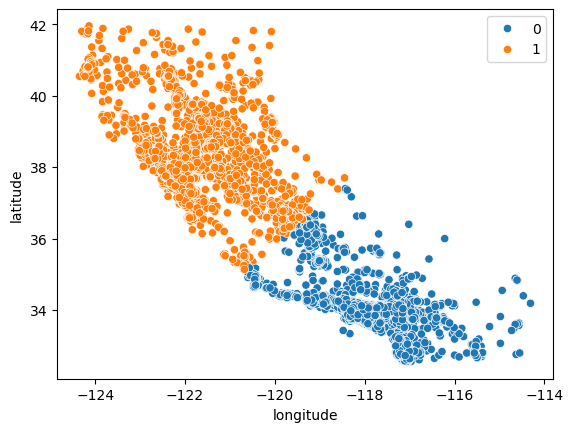

In [23]:
# Display the Clusters using seaborn
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=kmeans.labels_)

<Axes: ylabel='median_house_value'>

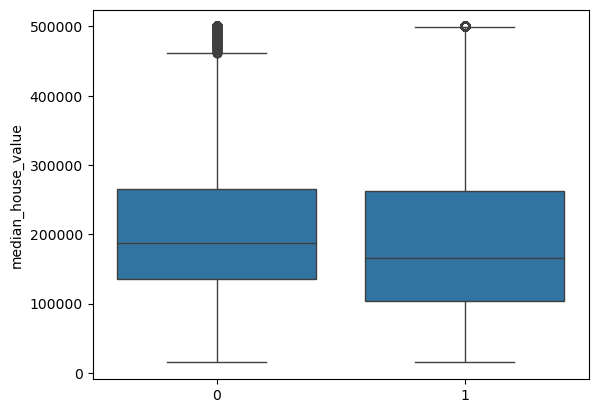

In [24]:
# Use seaborn Boxplots to visualize cluster distribution
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])